In [ ]:
%autosave 2

Autosaving every 2 seconds


Task 2 :


Your task 2 is to apply the techniques such as histogram equalization, histogram modifications, Fourier transformations, and geometric, projective, and affine transformations ( You are not limited only to these operations. You can show your creativity too) to the images in your application.
Introduce different types of noises in the images and apply appropriate filters to enhance the image.

Preprocessing

Resizing and Scaling

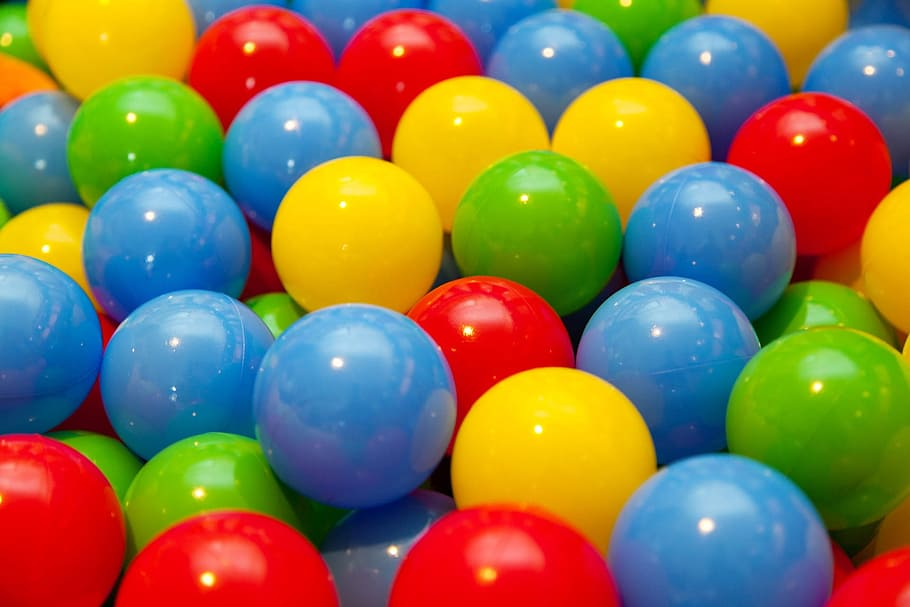

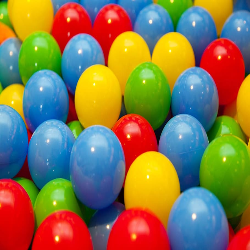

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('/content/img.jpg')

image = cv2.resize(img, (250,250), interpolation=cv2.INTER_LINEAR)
cv2_imshow(img)
cv2_imshow(image)

Insights : Since the original image size if large, it is difficult to work that image and to output so resizing it.


 Image resizing works by either increasing or decreasing the number of pixels in an image, adjusting its width and height accordingly, while OpenCV's cv2.resize() function performs this operation efficiently.

Image Grayscaling

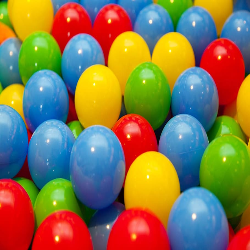

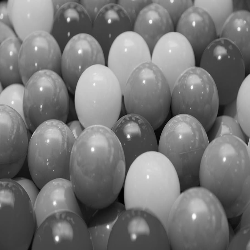

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2_imshow(gray_image)

Insights : Image greyscaling converts a color image into a single-channel grayscale image by eliminating color information, leaving only intensity values, which simplifies further image processing tasks.

Image Thresholding

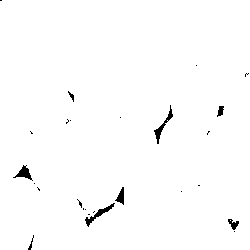

In [ ]:
_, binary_image = cv2.threshold(gray_image, 25, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)


Insights : Image thresholding is a binary image segmentation technique that separates pixels into two classes based on their intensity values, either converting them to black (0) or white (255), simplifying object detection and feature extraction.

Image Normalization

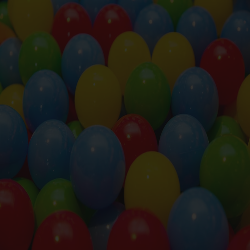

In [ ]:
normalized_image = cv2.normalize(image, None, 10, 50, cv2.NORM_MINMAX)
cv2_imshow(normalized_image)

Insights : Image normalization is a preprocessing technique that scales the pixel values of an image to a predefined range, often [0, 1] or [0, 255], improving the comparability and convergence of deep learning models.

Image Cropping and Region of Interest (ROI) Extraction

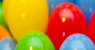

In [ ]:
roi = image[0:50, 5:100]
cv2_imshow(roi)

Insights : Image cropping involves extracting a specific region or sub-image from an original image based on specified coordinates or boundaries, focusing on the area of interest.

Image Denoising

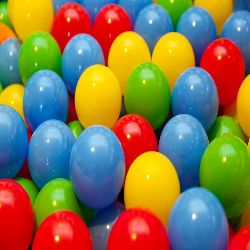

In [ ]:
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 1)
cv2_imshow(denoised_image)

Insights : Image denoising is a technique used to reduce noise and improve the clarity of an image by suppressing random variations in pixel values caused by noise during image acquisition or transmission.

Edge Detection

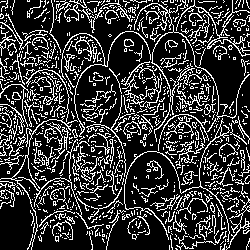

In [ ]:
edges = cv2.Canny(gray_image, 10, 30)
cv2_imshow(edges)

Insights : Edge detection is a fundamental image processing technique used to identify sharp changes in pixel intensity, representing object boundaries or edges in an image.

Histogram equalization

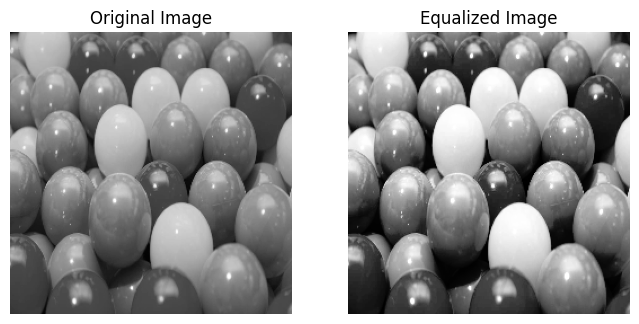

In [ ]:
image = gray_image
def histogram_equalization(image):

    if image is not None:
        equalized_image = cv2.equalizeHist(image)
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(equalized_image, cmap='gray')
        plt.title('Equalized Image')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    histogram_equalization(image)


Insights : Histogram equalization is an image enhancement technique used to improve the contrast of an image by redistributing the intensity levels across the entire range.

Histogram modifications

i) Adaptive Histogram Equalization

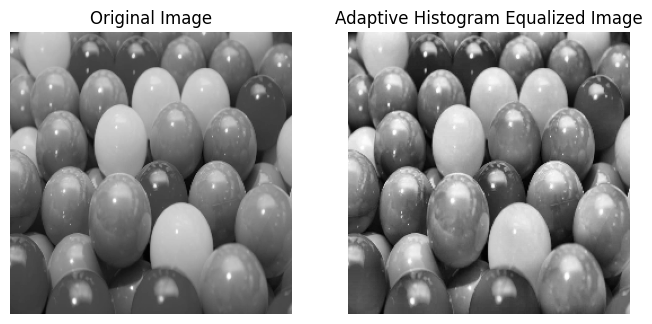

In [ ]:
def adaptive_histogram_equalization(image):

    if image is not None:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        equalized_image = clahe.apply(image)
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(equalized_image, cmap='gray')
        plt.title('Adaptive Histogram Equalized Image')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    adaptive_histogram_equalization(image)


Insights : Adaptive Histogram Equalization is an enhancement technique used to improve the contrast of an image by applying histogram equalization locally, varying the enhancement across different regions of the image.

ii) Histogram Matching

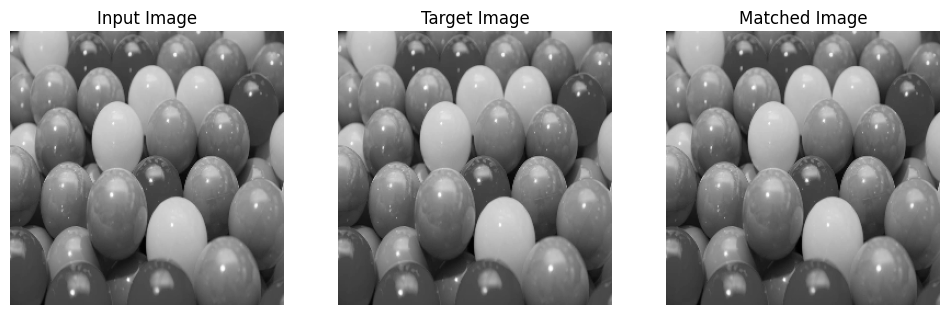

In [ ]:
def histogram_matching(input_image, target_image):

    if input_image is not None and target_image is not None:
        input_hist, _ = np.histogram(input_image.flatten(), 256, [0, 256])
        target_hist, _ = np.histogram(target_image.flatten(), 256, [0, 256])
        input_cdf = input_hist.cumsum()
        target_cdf = target_hist.cumsum()

        input_cdf = 255 * input_cdf / input_cdf[-1]
        target_cdf = 255 * target_cdf / target_cdf[-1]

        lookup_table = np.interp(input_cdf, target_cdf, range(256))

        matched_image = cv2.LUT(input_image, lookup_table)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(input_image, cmap='gray')
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(target_image, cmap='gray')
        plt.title('Target Image')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(matched_image, cmap='gray')
        plt.title('Matched Image')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Input or target image not found or could not be read.")

if __name__ == "__main__":
    histogram_matching(image, image)


Insights : Histogram Matching is a technique used to adjust the pixel intensity distribution of an image to match a desired histogram, aligning the image's appearance with a reference image or a target histogram.

iii) Contrast Stretching

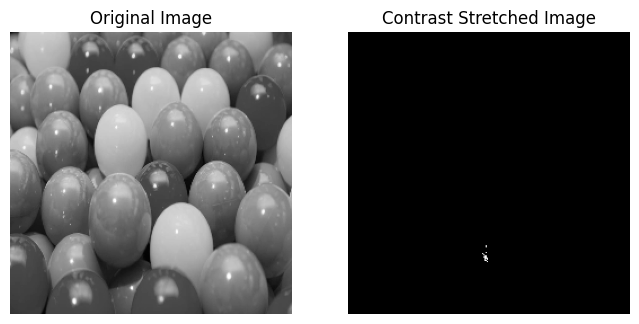

In [ ]:
def contrast_stretching(image):

    if image is not None:
        min_intensity = np.min(image)
        max_intensity = np.max(image)

        stretched_image = ((image - min_intensity) * 255 / (max_intensity - min_intensity)).astype(np.uint8)

        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(stretched_image, cmap='gray')
        plt.title('Contrast Stretched Image')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    contrast_stretching(image)


Insights : Contrast Stretching is an image enhancement technique used to improve the contrast of an image by expanding the range of pixel intensities to cover the entire available spectrum.

Fourier transformations

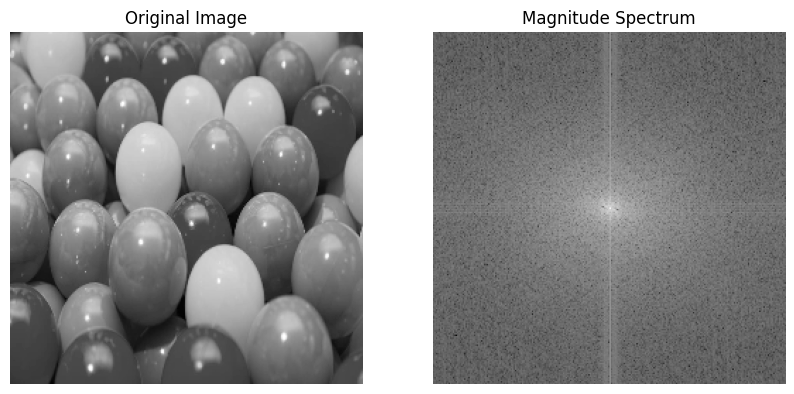

In [ ]:
def fourier_transform(image):

    if image is not None:
        dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)

        magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

        inverse_dft_shift = np.fft.ifftshift(dft_shift)
        inverse_dft = cv2.idft(inverse_dft_shift)
        reconstructed_image = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title('Magnitude Spectrum')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    fourier_transform(image)


Insights : Fourier Transform is a mathematical tool used to transform a signal from the time domain to the frequency domain, revealing the frequency components present in the signal.

 geometric transformation

i) rotation

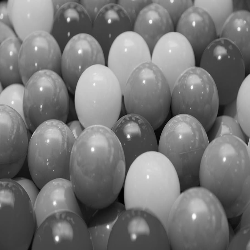

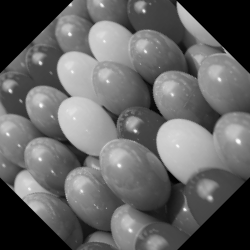

In [ ]:
def rotate_image(image, angle):

    if image is not None:
        height, width = image.shape[:2]
        center = (width // 2, height // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

        cv2_imshow(image)
        cv2_imshow(rotated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    rotate_image(image,45)


Insights : Image rotation is a geometric transformation that rotates an image around a specified pivot point, changing its orientation by a certain angle.

ii) scaling

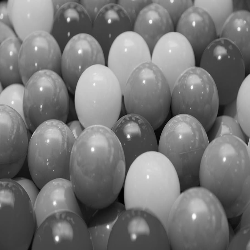

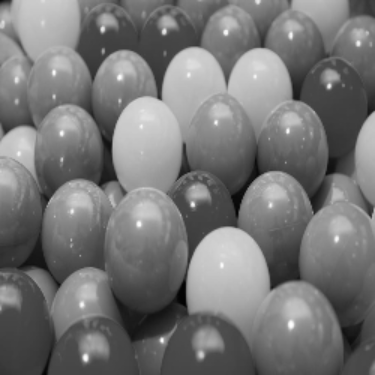

In [ ]:
def scale_image(image, scale_factor):

    if image is not None:
        height, width = image.shape[:2]

        scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

        cv2_imshow(image)
        cv2_imshow(scaled_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    scale_image(image,1.5)


Insights : Image scaling is a geometric transformation that resizes an image by changing its dimensions while preserving its aspect ratio.

iii) translation

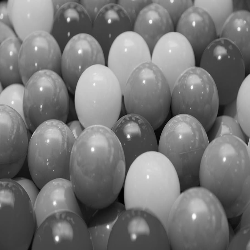

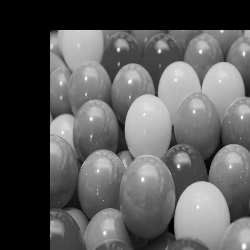

In [ ]:
def translate_image(image, tx, ty):

    if image is not None:
        height, width = image.shape[:2]

        translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

        translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

        cv2_imshow(image)
        cv2_imshow(translated_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    translate_image(image,50,30)


Insights : Image translation is a geometric transformation that shifts an image along the x and y axes by a specified amount.

iv) perspective transformation

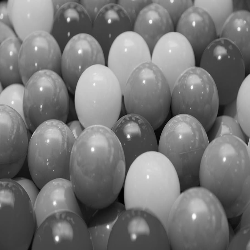

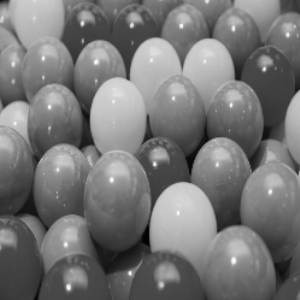

In [ ]:
def perspective_transform(image):

    if image is not None:
        points1 = np.float32([[0, 0], [image.shape[1] - 1, 0], [0, image.shape[0] - 1], [image.shape[1] - 1, image.shape[0] - 1]])

        points2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

        perspective_matrix = cv2.getPerspectiveTransform(points1, points2)
        transformed_image = cv2.warpPerspective(image, perspective_matrix, (300, 300))
        cv2_imshow(image)
        cv2_imshow(transformed_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    perspective_transform(image)


Insights : Perspective transformation is a geometric transformation that projects an image onto a different perspective, simulating how the image would appear when viewed from a different viewpoint.

Projective transfromation

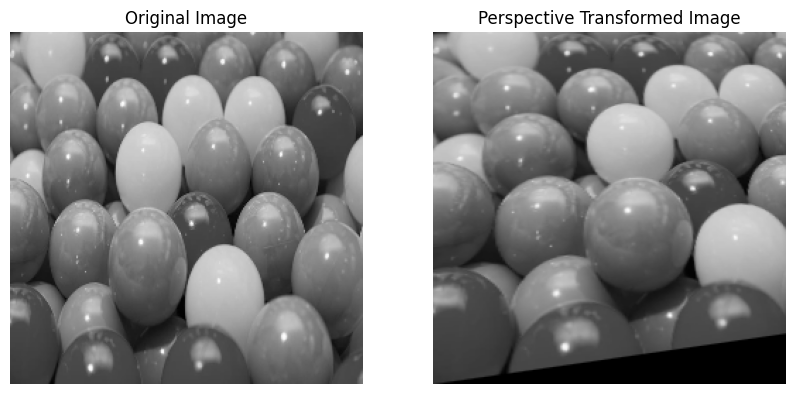

In [ ]:
def projective_transform(image):

    if image is not None:
        points_src = np.float32([[0, 0], [image.shape[1] - 1, 0], [0, image.shape[0] - 1], [image.shape[1] - 1, image.shape[0] - 1]])

        points_dst = np.float32([[0, 0], [300 - 1, 0], [0, 250 - 1], [350 - 1, 200 - 1]])
        perspective_matrix = cv2.getPerspectiveTransform(points_src, points_dst)
        transformed_image = cv2.warpPerspective(image, perspective_matrix, (250, 250))
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title('Perspective Transformed Image')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    projective_transform(image)


Insights : Projective transformation, also known as homography, is a geometric transformation that maps points from one plane to another non-coplanar plane, allowing for perspective distortion correction and registration between images taken from different viewpoints.

Affine trandformation

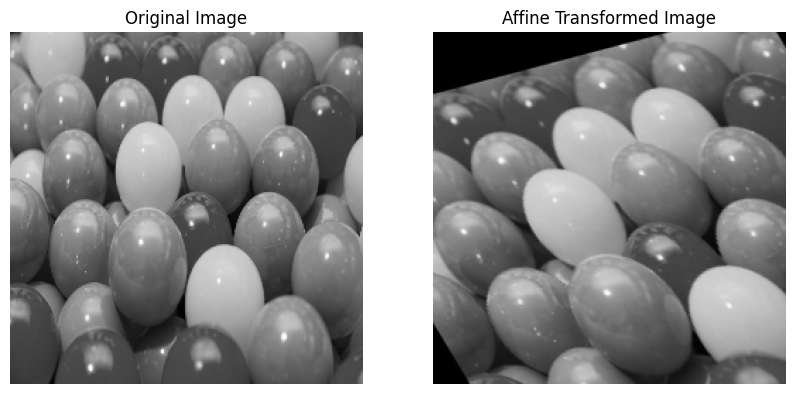

In [ ]:
def affine_transform(image):

    if image is not None:
        points_src = np.float32([[50, 50], [200, 50], [50, 200]])
        points_dst = np.float32([[10, 100], [200, 50], [100, 250]])

        affine_matrix = cv2.getAffineTransform(points_src, points_dst)
        transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title('Affine Transformed Image')
        plt.axis('off')

        plt.show()
    else:
        print("Error: Image not found or could not be read.")

if __name__ == "__main__":
    affine_transform(image)


Insights : Affine transformation is a 2D geometric transformation that preserves parallel lines, distances, and angles in an image, allowing for translation, rotation, scaling, and shearing.

Noises

i) gaussian

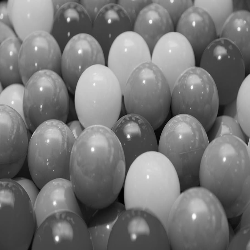

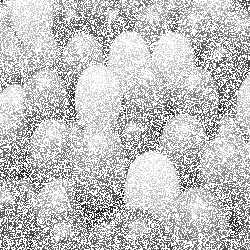

In [ ]:
def add_gaussian_noise(image, mean=0, std=30):
    height, width = image.shape[:2]
    gaussian_noise = np.random.normal(mean, std, (height, width))
    noisy_image = cv2.add(image, gaussian_noise.astype(np.uint8))
    return noisy_image

noisy_image = add_gaussian_noise(image)
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Gaussian noise is a type of random noise that follows a Gaussian (normal) distribution, often added to images to simulate real-world noise in various imaging processes.


ii) salt and pepper

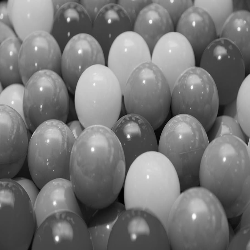

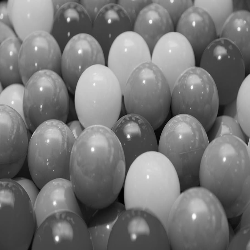

In [ ]:
def add_salt_and_pepper_noise(image, prob=0.05):
    height, width = image.shape[:2]
    num_pixels = int(prob * height * width)
    coords = [np.random.randint(0, dim, num_pixels) for dim in (height, width)]
    return image

noisy_image = add_salt_and_pepper_noise(image, prob=0.05)
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Salt and Pepper noise is a type of impulse noise that randomly replaces some pixels in an image with either the maximum (salt) or minimum (pepper) intensity values, creating black and white dots in the image.

iii) speckle noise

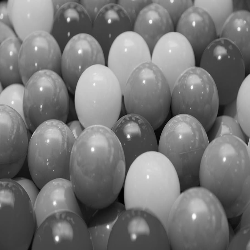

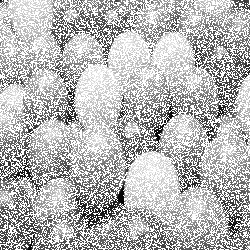

In [ ]:
def add_speckle_noise(image, scale=0.1):
    height, width = image.shape[:2]
    speckle_noise = np.random.randn(height, width) * image * scale
    noisy_image = cv2.add(image, speckle_noise.astype(np.uint8))
    return noisy_image

noisy_image = add_speckle_noise(image, scale=0.1)
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Speckle noise is a type of noise that occurs in images as bright or dark spots, caused by random variations in pixel intensities.

iv) poisson noise

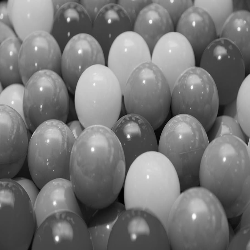

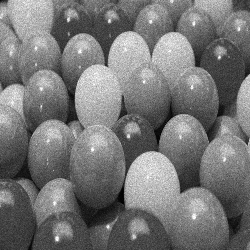

In [ ]:
def add_poisson_noise(image):
    noisy_image = np.random.poisson(image)
    return noisy_image

noisy_image = add_poisson_noise(image)
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Poisson noise is a type of noise that occurs in images due to the random variation of photons in the image formation process, especially in low-light conditions.

filters

i) gaussian

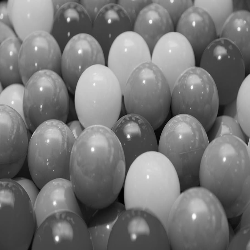

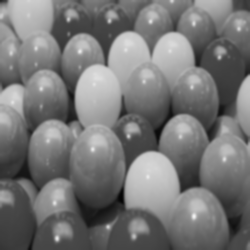

In [ ]:
def apply_gaussian_blur(image, kernel_size=(5, 5), sigmaX=0):
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigmaX)
    return blurred_image

blurred_image = apply_gaussian_blur(image)
cv2_imshow( image)
cv2_imshow(blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Gaussian filters are a type of linear filter used in image processing for smoothing and reducing noise in images. They convolve the image with a Gaussian kernel, which emphasizes nearby pixels more than distant ones.

ii) median blur

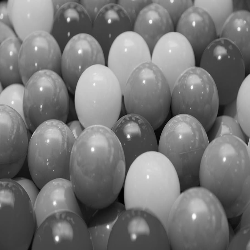

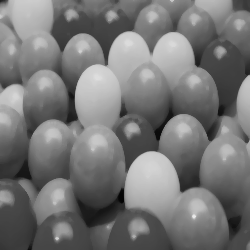

In [ ]:
def apply_median_blur(image, kernel_size=5):
    blurred_image = cv2.medianBlur(image, kernel_size)
    return blurred_image

blurred_image = apply_median_blur(image)
cv2_imshow(image)
cv2_imshow(blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Median blur is a non-linear filter used for image denoising. It replaces each pixel value with the median value of its neighboring pixels within a specified kernel size.

iii) sobel edge detection

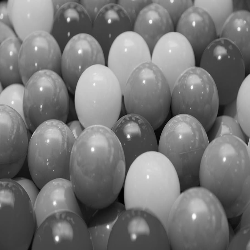

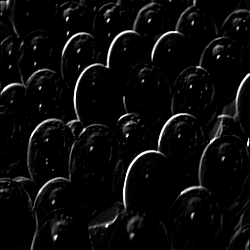

In [ ]:
def apply_sobel_edge_detection(image):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    edge_image = cv2.addWeighted(gradient_x, 0.5, gradient_y, 0.5, 0)
    return edge_image

edge_image = apply_sobel_edge_detection(image)
cv2_imshow(image)
cv2_imshow(edge_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Sobel edge detection is a common method used to detect edges in an image by computing gradient magnitudes in the x and y directions.

iv) canny edge detection

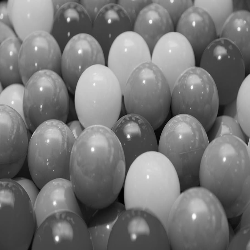

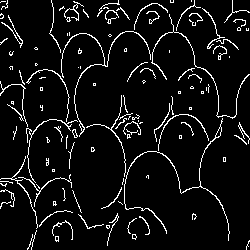

In [ ]:
def apply_canny_edge_detection(image, min_threshold, max_threshold):
    edge_image = cv2.Canny(image, min_threshold, max_threshold)
    return edge_image

edge_image = apply_canny_edge_detection(image, 100, 200)
cv2_imshow(image)
cv2_imshow(edge_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : Canny edge detection is a popular edge detection technique used to detect a wide range of edges in an image with high accuracy and low error rate.

v) bilateral filter

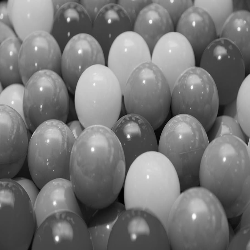

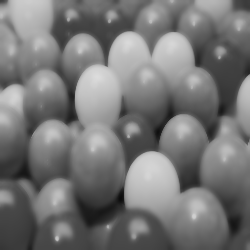

In [ ]:
def apply_bilateral_filter(image, d, sigma_color, sigma_space):
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
    return filtered_image

filtered_image = apply_bilateral_filter(image, d=9, sigma_color=75, sigma_space=75)
cv2_imshow(image)
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Insights : The bilateral filter is a non-linear filter used for image denoising while preserving edges and fine details.